In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [88]:
train_data=pd.read_csv("C:/Users/user/Downloads/Data/Loan Status Prediction/Loan_Status_train.csv")

In [89]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [90]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [91]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [92]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
train_data["Gender"].fillna(train_data["Gender"].mode()[0],inplace=True)
train_data["Married"].fillna(train_data["Married"].mode()[0],inplace=True)
train_data["Dependents"].fillna(train_data["Dependents"].mode()[0],inplace=True)
train_data["Self_Employed"].fillna(train_data["Self_Employed"].mode()[0],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13284\3234316877.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Gender"].fillna(train_data["Gender"].mode()[0],inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13284\3234316877.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [94]:

train_data['LoanAmount'].fillna(train_data["LoanAmount"].mean(),inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data["Loan_Amount_Term"].median(),inplace=True)
train_data['Credit_History'].fillna(train_data["Credit_History"].mean(),inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13284\3972599721.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['LoanAmount'].fillna(train_data["LoanAmount"].mean(),inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13284\3972599721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [95]:

train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [96]:
#departments value count before

train_data.Dependents.value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [97]:
# Dependents columns replaceing value 3+ to 4
train_data.replace(to_replace="3+" ,value="4",inplace=True)

In [98]:
#departments value count after:
train_data.Dependents.value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

In [99]:
# drop the loan_id columns
train_data.drop(columns = "Loan_ID", axis = 1, inplace = True)

<Axes: xlabel='Credit_History', ylabel='count'>

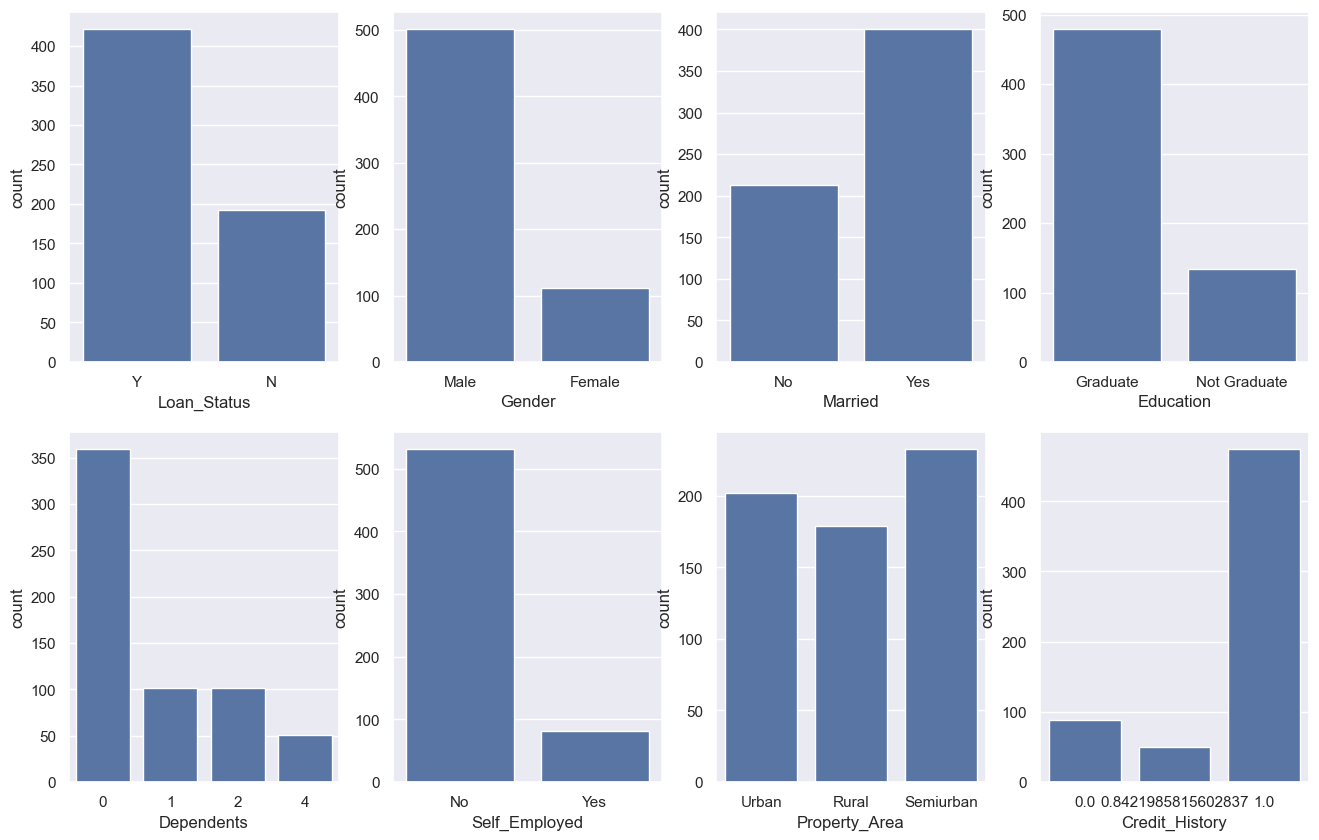

In [100]:
#Data visualtion:
fig, ax =plt.subplots(2,4,figsize=(16,10))

sns.countplot(x="Loan_Status",data=train_data,ax=ax[0][0])
sns.countplot(x="Gender",data=train_data,ax=ax[0][1])
sns.countplot(x="Married",data=train_data,ax=ax[0][2])
sns.countplot(x="Education",data=train_data,ax=ax[0][3])
sns.countplot(x='Dependents', data=train_data, ax=ax[1][0])
sns.countplot(x='Self_Employed', data=train_data, ax=ax[1][1])
sns.countplot(x='Property_Area', data=train_data, ax=ax[1][2])
sns.countplot(x='Credit_History', data=train_data, ax=ax[1][3])




<Axes: xlabel='Education', ylabel='count'>

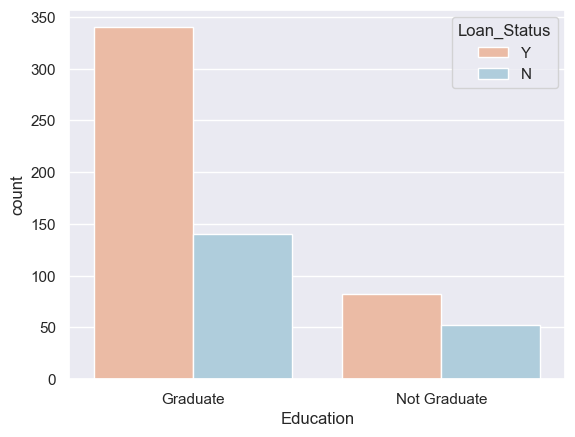

In [101]:
# Education and Loan Status



sns.countplot(x="Education",hue="Loan_Status",data=train_data,palette="RdBu")

<Axes: xlabel='Gender', ylabel='count'>

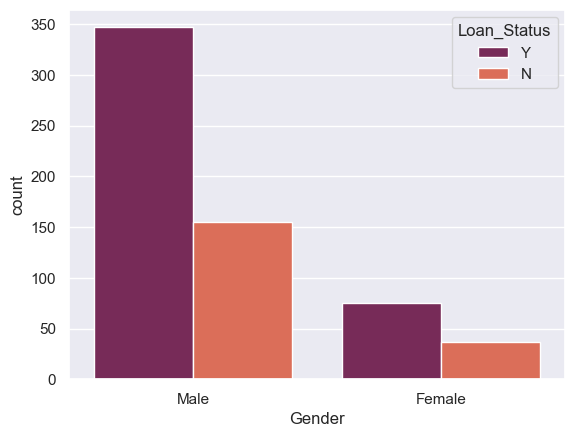

In [102]:
# Gender and Loan status
sns.countplot(x = "Gender" , hue = "Loan_Status", data= train_data, palette= "rocket")

<Axes: xlabel='Married', ylabel='count'>

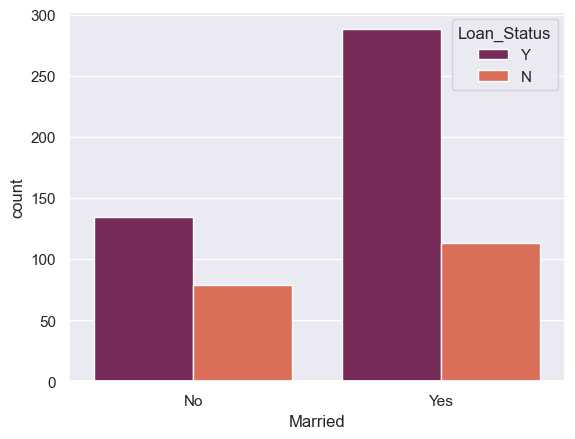

In [103]:
# Married and Loan status
sns.countplot(x = "Married" , hue = "Loan_Status", data= train_data, palette= "rocket")

In [104]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [105]:

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Assuming 'gender' is a column that contains 'Male' and 'Female'
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])
train_data['Married'] = label_encoder.fit_transform(train_data['Married'])
train_data['Education'] = label_encoder.fit_transform(train_data['Education'])
train_data['Self_Employed'] = label_encoder.fit_transform(train_data['Self_Employed'])
train_data['Property_Area'] = label_encoder.fit_transform(train_data['Property_Area'])
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'])

<Axes: >

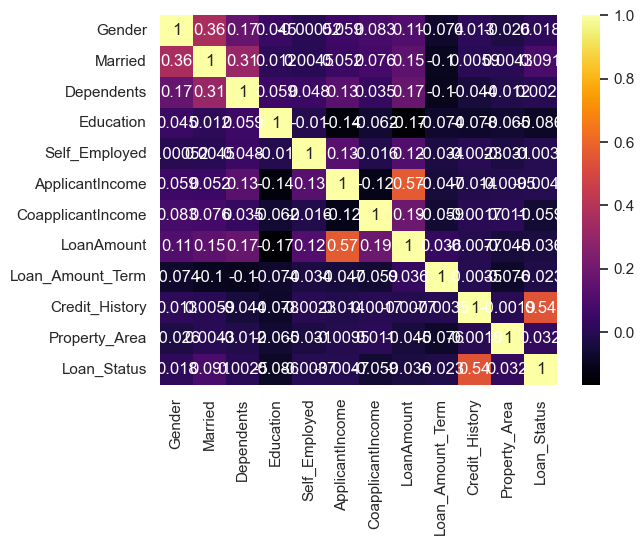

In [106]:

#corrrealitions:


sns.heatmap(train_data.corr(), annot = True, cmap='inferno')

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

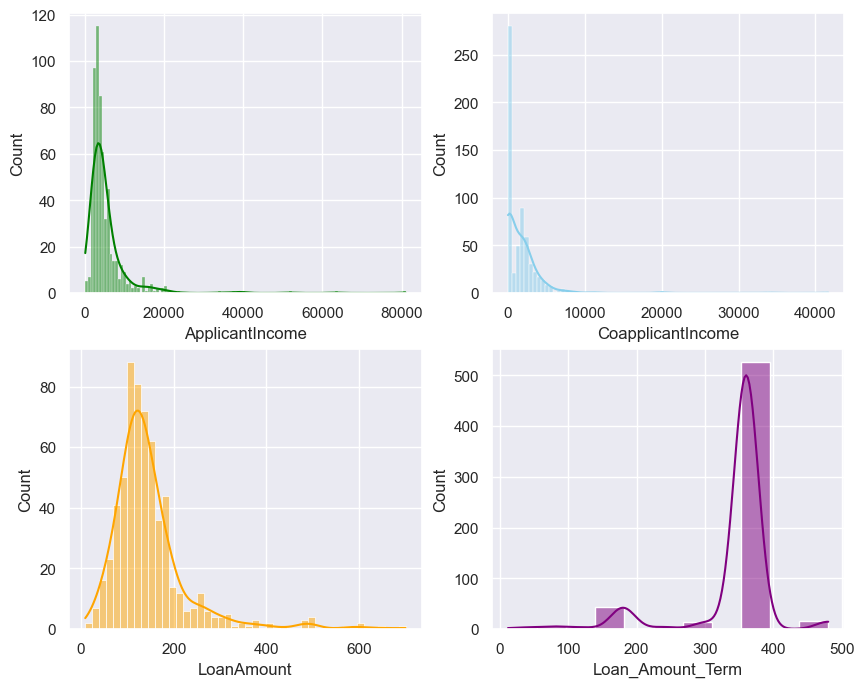

In [107]:
# Distribution numerical variable using the Histogram 
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=train_data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=train_data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=train_data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=train_data, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple')

<Axes: ylabel='LoanAmount'>

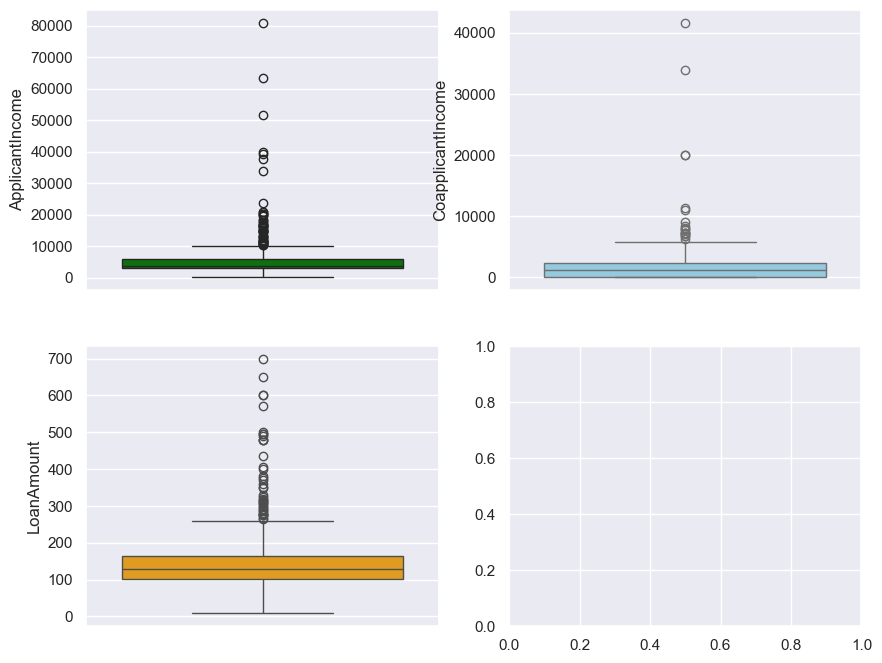

In [108]:
#Box plot using to show outliers
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=train_data, y="ApplicantIncome", ax=axs[0, 0], color='green')
sns.boxplot(data=train_data, y="CoapplicantIncome", ax=axs[0, 1], color='skyblue')
sns.boxplot(data=train_data, y="LoanAmount", ax=axs[1, 0], color='orange')

In [109]:
# seprating the data in x and y
X = train_data.drop(columns = "Loan_Status", axis = 1)
y = train_data["Loan_Status"]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [111]:
print(X.shape,X_train.shape,X_test.shape)


(614, 11) (491, 11) (123, 11)


In [112]:
log_model = LogisticRegression(max_iter=150, solver="liblinear") 
log_model.fit(X_train,y_train)

log_prediction = log_model.predict(X_test)

print(classification_report(log_prediction, y_test))
print( confusion_matrix(log_prediction,y_test))

log_acc = accuracy_score(log_prediction,y_test)
print("Logistic Regression accuracy_score: {:.2f}% ". format(log_acc*100))

              precision    recall  f1-score   support

           0       0.42      0.95      0.58        19
           1       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123

[[18  1]
 [25 79]]
Logistic Regression accuracy_score: 78.86% 


In [113]:
svm_model = SVC(kernel="rbf",gamma ='auto', C = 6) #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' # auto,scale
svm_model.fit(X_train, y_train)

svm_prediction = svm_model.predict(X_test)

print(classification_report(svm_prediction,y_test))
print(confusion_matrix(svm_prediction,y_test))

svm_acc = accuracy_score(svm_prediction,y_test)
print("SVM accuracy_score : {:.2f}%".format(svm_acc*100))

              precision    recall  f1-score   support

           0       0.02      1.00      0.05         1
           1       1.00      0.66      0.79       122

    accuracy                           0.66       123
   macro avg       0.51      0.83      0.42       123
weighted avg       0.99      0.66      0.79       123

[[ 1  0]
 [42 80]]
SVM accuracy_score : 65.85%


In [114]:
dt_model = DecisionTreeClassifier(criterion='gini',splitter = "random")
dt_model.fit(X_train,y_train)

dt_prediction = dt_model.predict(X_test)

print(classification_report(dt_prediction, y_test))
print( confusion_matrix(dt_prediction,y_test))

dt_acc = accuracy_score(dt_prediction,y_test)
print("Decision_tree accuracy_score: {:.2f}% ". format(dt_acc*100))

              precision    recall  f1-score   support

           0       0.51      0.69      0.59        32
           1       0.88      0.77      0.82        91

    accuracy                           0.75       123
   macro avg       0.69      0.73      0.70       123
weighted avg       0.78      0.75      0.76       123

[[22 10]
 [21 70]]
Decision_tree accuracy_score: 74.80% 


In [115]:
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=120)
rf_model.fit(X_train,y_train)

rf_prediction = rf_model.predict(X_test)

print(classification_report(rf_prediction, y_test))
print( confusion_matrix(rf_prediction,y_test))

rf_acc = accuracy_score(rf_prediction,y_test)
print("Random_forest accuracy_score: {:.2f}% ". format(rf_acc*100))

              precision    recall  f1-score   support

           0       0.42      0.82      0.55        22
           1       0.95      0.75      0.84       101

    accuracy                           0.76       123
   macro avg       0.68      0.79      0.70       123
weighted avg       0.85      0.76      0.79       123

[[18  4]
 [25 76]]
Random_forest accuracy_score: 76.42% 


In [116]:
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X_train,y_train)

knn_prediction = knn_model.predict(X_test)

print(classification_report(knn_prediction, y_test))
print( confusion_matrix(knn_prediction,y_test))

knn_acc = accuracy_score(knn_prediction,y_test)
print("KNN accuracy_score: {:.2f}% ". format(knn_acc*100))

              precision    recall  f1-score   support

           0       0.07      0.23      0.11        13
           1       0.88      0.64      0.74       110

    accuracy                           0.59       123
   macro avg       0.47      0.43      0.42       123
weighted avg       0.79      0.59      0.67       123

[[ 3 10]
 [40 70]]
KNN accuracy_score: 59.35% 


In [117]:
compare_models=pd.DataFrame({"Model":['Logistic Regression',"Support Vector Machine", "Decision Tree", 
                             "Random Forest", "K-Nearest Neighbour"],
                             "Accuracy_Score":[log_acc*100,svm_acc*100,dt_acc*100,rf_acc*100,knn_acc*100]})

compare_models.sort_values(by="Accuracy_Score", ascending=False)

,Model,Accuracy_Score
0,Logistic Regression,78.861789
3,Random Forest,76.422764
2,Decision Tree,74.796748
1,Support Vector Machine,65.853659
4,K-Nearest Neighbour,59.349593
